### I did this project as part of my personal development in Machine learning. It is a regression problem that predicts wind power.

### Import Libraries

In [36]:
import pandas as pd
import numpy as np

#### Import Data

In [37]:
datatrain= pd.read_csv('train-en.csv')
datatest= pd.read_csv('challenge-en.csv')
dataevaluate= pd.read_csv('eval-en.csv')


In [38]:
datatrain.head()

,Date,wind_speed48M,wind_speed100M,wind_speed152M,wind_direction48M,wind_direction100M,wind_direction152M,wind_speed_100MP10,wind_speed_100MP20,wind_speed_100MP30,wind_speed_100MP40,wind_speed_100MP50,wind_speed_100MP60,wind_speed_100MP70,wind_speed_100MP80,wind_speed_100MP90,Interpolated,available_capacity,Output
0,2016-01-01 0:00:00,8.490,10.7700,12.690,188.00,190.0,194.00,9.0700,9.630,10.060,10.43,10.78,11.0500,11.5400,11.940,12.4200,0,122400,79168
1,2016-01-01 0:15:00,8.395,10.6175,12.475,190.75,193.0,196.75,9.0425,9.555,9.955,10.31,10.63,10.9275,11.3875,11.815,12.3125,1,122400,75124
2,2016-01-01 0:30:00,8.300,10.4650,12.260,193.50,196.0,199.50,9.0150,9.480,9.850,10.19,10.48,10.8050,11.2350,11.690,12.2050,1,122400,76072
3,2016-01-01 0:45:00,8.205,10.3125,12.045,196.25,199.0,202.25,8.9875,9.405,9.745,10.07,10.33,10.6825,11.0825,11.565,12.0975,1,122400,67964
4,2016-01-01 1:00:00,8.110,10.1600,11.830,199.00,202.0,205.00,8.9600,9.330,9.640,9.95,10.18,10.5600,10.9300,11.440,11.9900,0,122400,69988


In [39]:
datatest.head()

,Date,wind_speed48M,wind_speed100M,wind_speed152M,wind_direction48M,wind_direction100M,wind_direction152M,wind_speed_100MP10,wind_speed_100MP20,wind_speed_100MP30,wind_speed100MP40,wind_speed_100MP50,wind_speed_100MP60,wind_speed_100MP70,wind_speed_100MP80,wind_speed_100MP90,Interpolated,available_capacity,Output
0,2017-07-01 0:00:00,4.850,5.810,6.41,263.00,266.0,268.0,3.9200,4.7500,5.1600,5.53,5.820,6.0400,6.300,6.8500,7.460,0,119000,X
1,2017-07-01 0:15:00,4.925,5.885,6.50,262.75,265.5,267.5,3.9625,4.8175,5.2725,5.61,5.895,6.1425,6.415,6.9275,7.535,1,119000,X
2,2017-07-01 0:30:00,5.000,5.960,6.59,262.50,265.0,267.0,4.0050,4.8850,5.3850,5.69,5.970,6.2450,6.530,7.0050,7.610,1,119000,X
3,2017-07-01 0:45:00,5.075,6.035,6.68,262.25,264.5,266.5,4.0475,4.9525,5.4975,5.77,6.045,6.3475,6.645,7.0825,7.685,1,119000,X
4,2017-07-01 1:00:00,5.150,6.110,6.77,262.00,264.0,266.0,4.0900,5.0200,5.6100,5.85,6.120,6.4500,6.760,7.1600,7.760,0,119000,X


In [40]:
dataevaluate.head()

,Date,wind_speed48M,wind_speed100M,wind_speed152M,wind_direction48M,wind_direction100M,wind_direction152M,wind_speed_100MP10,wind_speed_100MP20,wind_speed_100MP30,wind_speed_100MP40,wind_speed_100MP50,wind_speed_100MP60,wind_speed_100MP70,wind_speed_100MP80,wind_speed_100MP90,Interpolated,available_capacity,Output
0,2017-07-01 00:00:00,4.850,5.810,6.41,263.00,266.0,268.0,3.9200,4.7500,5.1600,5.53,5.820,6.0400,6.300,6.8500,7.460,0,119000,15912
1,2017-07-01 00:15:00,4.925,5.885,6.50,262.75,265.5,267.5,3.9625,4.8175,5.2725,5.61,5.895,6.1425,6.415,6.9275,7.535,1,119000,18736
2,2017-07-01 00:30:00,5.000,5.960,6.59,262.50,265.0,267.0,4.0050,4.8850,5.3850,5.69,5.970,6.2450,6.530,7.0050,7.610,1,119000,19680
3,2017-07-01 00:45:00,5.075,6.035,6.68,262.25,264.5,266.5,4.0475,4.9525,5.4975,5.77,6.045,6.3475,6.645,7.0825,7.685,1,119000,18112
4,2017-07-01 01:00:00,5.150,6.110,6.77,262.00,264.0,266.0,4.0900,5.0200,5.6100,5.85,6.120,6.4500,6.760,7.1600,7.760,0,119000,21144


In [41]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52508 entries, 0 to 52507
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                52508 non-null  object 
 1   wind_speed48M       52508 non-null  float64
 2   wind_speed100M      52508 non-null  float64
 3   wind_speed152M      52508 non-null  float64
 4   wind_direction48M   52508 non-null  float64
 5   wind_direction100M  52508 non-null  float64
 6   wind_direction152M  52508 non-null  float64
 7   wind_speed_100MP10  52508 non-null  float64
 8   wind_speed_100MP20  52508 non-null  float64
 9   wind_speed_100MP30  52508 non-null  float64
 10  wind_speed_100MP40  52508 non-null  float64
 11  wind_speed_100MP50  52508 non-null  float64
 12  wind_speed_100MP60  52508 non-null  float64
 13  wind_speed_100MP70  52508 non-null  float64
 14  wind_speed_100MP80  52508 non-null  float64
 15  wind_speed_100MP90  52508 non-null  float64
 16  Inte

In [42]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17668 entries, 0 to 17667
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                17668 non-null  object 
 1   wind_speed48M       17668 non-null  float64
 2   wind_speed100M      17668 non-null  float64
 3   wind_speed152M      17668 non-null  float64
 4   wind_direction48M   17668 non-null  float64
 5   wind_direction100M  17668 non-null  float64
 6   wind_direction152M  17668 non-null  float64
 7   wind_speed_100MP10  17668 non-null  float64
 8   wind_speed_100MP20  17668 non-null  float64
 9   wind_speed_100MP30  17668 non-null  float64
 10  wind_speed100MP40   17668 non-null  float64
 11  wind_speed_100MP50  17668 non-null  float64
 12  wind_speed_100MP60  17668 non-null  float64
 13  wind_speed_100MP70  17668 non-null  float64
 14  wind_speed_100MP80  17668 non-null  float64
 15  wind_speed_100MP90  17668 non-null  float64
 16  Inte

#### Define X and Y i.e, independent and dependent variables

In [43]:
x= datatrain.drop(['Date', 'Output'], axis =1).values
y=datatrain['Output'].values

In [44]:
x

array([[8.49000e+00, 1.07700e+01, 1.26900e+01, ..., 1.24200e+01,
        0.00000e+00, 1.22400e+05],
       [8.39500e+00, 1.06175e+01, 1.24750e+01, ..., 1.23125e+01,
        1.00000e+00, 1.22400e+05],
       [8.30000e+00, 1.04650e+01, 1.22600e+01, ..., 1.22050e+01,
        1.00000e+00, 1.22400e+05],
       ...,
       [5.03000e+00, 6.09000e+00, 6.73000e+00, ..., 7.35000e+00,
        1.00000e+00, 1.19000e+05],
       [5.03000e+00, 6.09000e+00, 6.73000e+00, ..., 7.35000e+00,
        1.00000e+00, 1.19000e+05],
       [5.03000e+00, 6.09000e+00, 6.73000e+00, ..., 7.35000e+00,
        1.00000e+00, 1.19000e+05]])

In [45]:
y

array([79168, 75124, 76072, ..., 18528, 15836, 15712], dtype=int64)

#### Split the data into training and test

In [46]:
#Since we have 2 seperate data for train and test, we don't need this
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Train the model on the training set

In [47]:
from sklearn.linear_model import LinearRegression

X_train = x
y_train = y
X_test =datatest.drop(['Date', 'Output'], axis =1).values
#y_test= 
mlearn = LinearRegression() #the model
mlearn.fit(X_train, y_train)


LinearRegression()

#### Prediction the test result

In [48]:
y_predict = mlearn.predict(X_test)
print(y_predict)

[19787.9282719  20481.55664626 21154.58506844 ... 80997.03149217
 80997.03149217 80997.03149217]


In [49]:
#If we test the model with the exact x values in row 1
mlearn.predict([[4.850, 5.810, 6.41,263.00,266.0,68.0,3.9200,4.7500,5.1600,5.53,5.820,6.0400,6.300,6.8500,7.460,0,119000]])

array([21255.45171245])

#### Evaluate the model

In [50]:
from sklearn.metrics import r2_score
y_test= dataevaluate['Output'].values
r2_score(y_test, y_predict)

0.7640337873486749

#### Visualization of result

Text(0.5, 1.0, 'Actual vs Predicted')

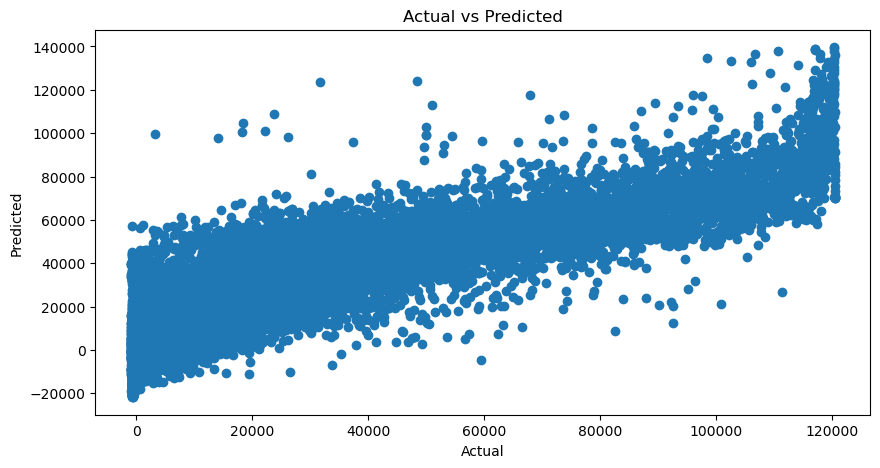

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.scatter(y_test,y_predict)
plt.title('Actual vs Predicted') bb 

In [52]:
pred_data = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_predict, 'Prediction Difference':y_test-y_predict})
pred_data[0:20]

,Actual Value,Predicted Value,Prediction Difference
0,15912,19787.928272,-3875.928272
1,18736,20481.556646,-1745.556646
2,19680,21154.585068,-1474.585068
3,18112,21827.613491,-3715.613491
4,21144,22480.041961,-1336.041961
5,21388,23363.816762,-1975.816762
6,19880,24226.991611,-4346.991611
7,26900,25090.166460,1809.833540
8,27044,25932.741357,1111.258643
9,22644,26530.080587,-3886.080587


#### Feature Selection

In [53]:
import seaborn as sns

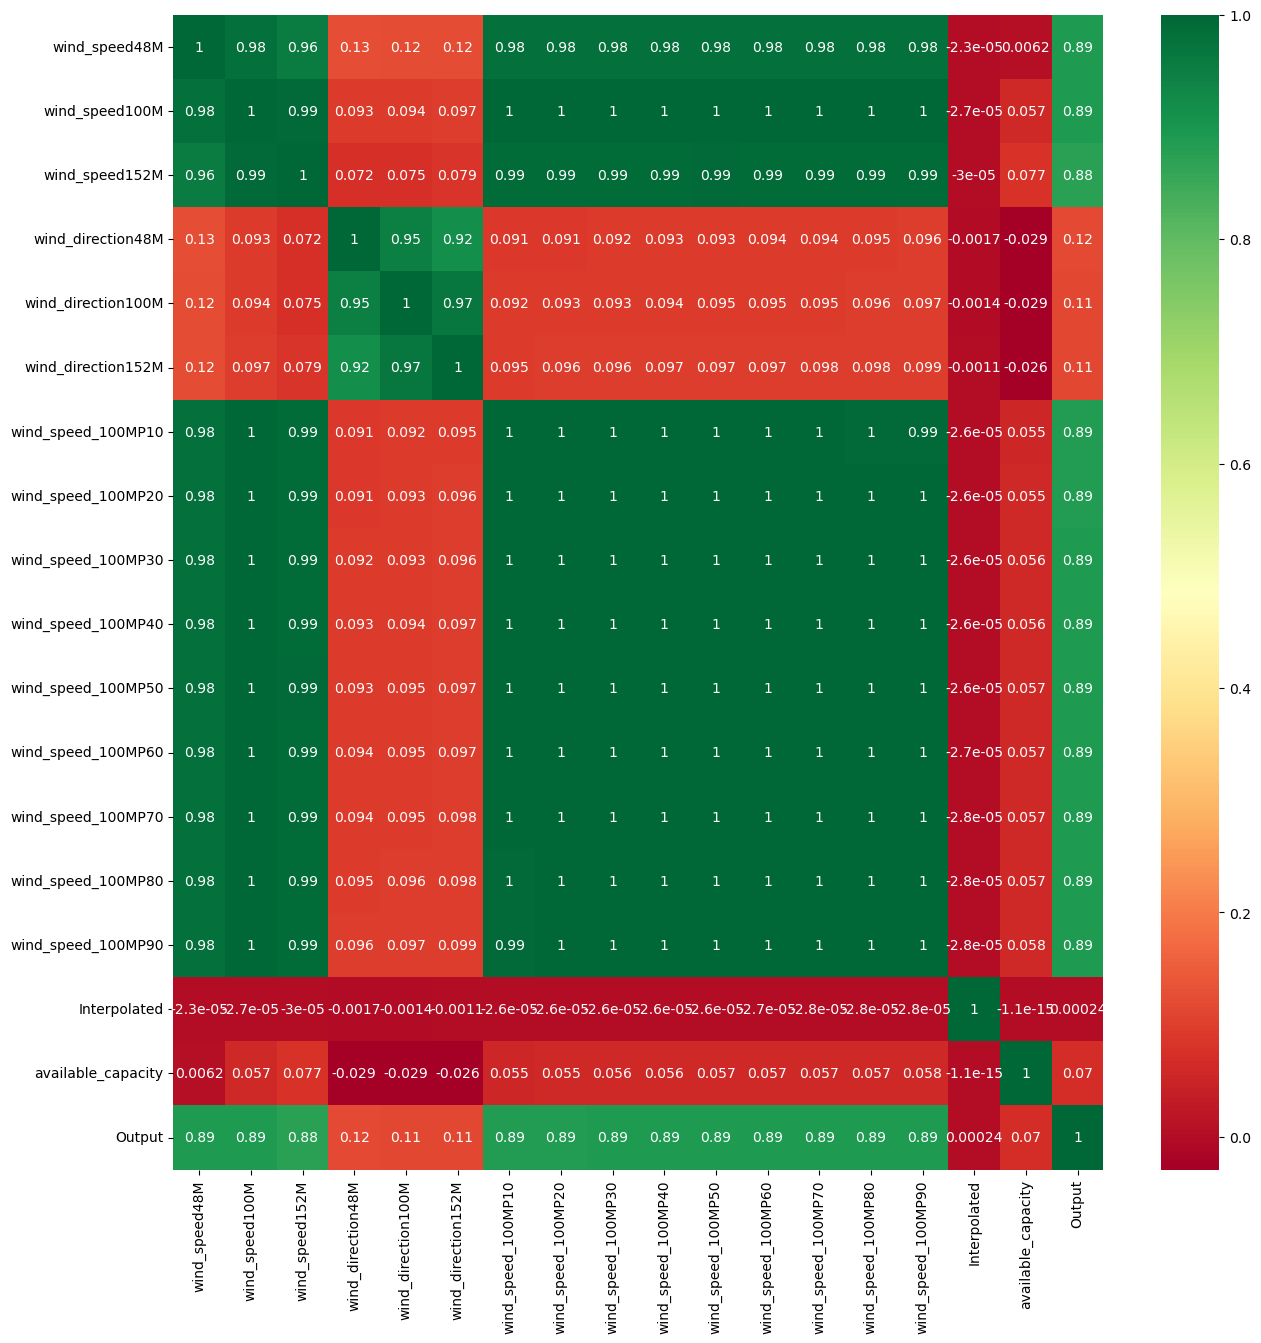

In [54]:
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = datatrain.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(datatrain[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [55]:
#drop uncorrelated features
x= datatrain.drop(['Date','wind_direction48M','wind_direction100M','wind_direction152M','Interpolated', 'Output'], axis =1).values
y=datatrain['Output'].values

In [56]:
x

array([[8.49000e+00, 1.07700e+01, 1.26900e+01, ..., 1.19400e+01,
        1.24200e+01, 1.22400e+05],
       [8.39500e+00, 1.06175e+01, 1.24750e+01, ..., 1.18150e+01,
        1.23125e+01, 1.22400e+05],
       [8.30000e+00, 1.04650e+01, 1.22600e+01, ..., 1.16900e+01,
        1.22050e+01, 1.22400e+05],
       ...,
       [5.03000e+00, 6.09000e+00, 6.73000e+00, ..., 6.87000e+00,
        7.35000e+00, 1.19000e+05],
       [5.03000e+00, 6.09000e+00, 6.73000e+00, ..., 6.87000e+00,
        7.35000e+00, 1.19000e+05],
       [5.03000e+00, 6.09000e+00, 6.73000e+00, ..., 6.87000e+00,
        7.35000e+00, 1.19000e+05]])

In [57]:
y

array([79168, 75124, 76072, ..., 18528, 15836, 15712], dtype=int64)

In [58]:
from sklearn.linear_model import LinearRegression

X_train = x
y_train = y
X_test =datatest.drop(['Date','wind_direction48M','wind_direction100M','wind_direction152M','Interpolated', 'Output'], axis =1).values
#y_test= 
mlearn = LinearRegression() #the model
mlearn.fit(X_train, y_train)


LinearRegression()

#### Prediction 

In [60]:
y_predict = mlearn.predict(X_test)
print(y_predict)

[19497.87629909 20161.9478569  20826.01941472 ... 81083.52343753
 81083.52343753 81083.52343753]


In [62]:
from sklearn.metrics import r2_score
#new_y_evaluate = dataevaluate.drop(['Date','wind_direction48M','wind_direction100M','wind_direction152M','Interpolated'])
y_test= dataevaluate['Output'].values
r2_score(y_test, y_predict)

0.765465024354611

Text(0.5, 1.0, 'Actual vs Predicted')

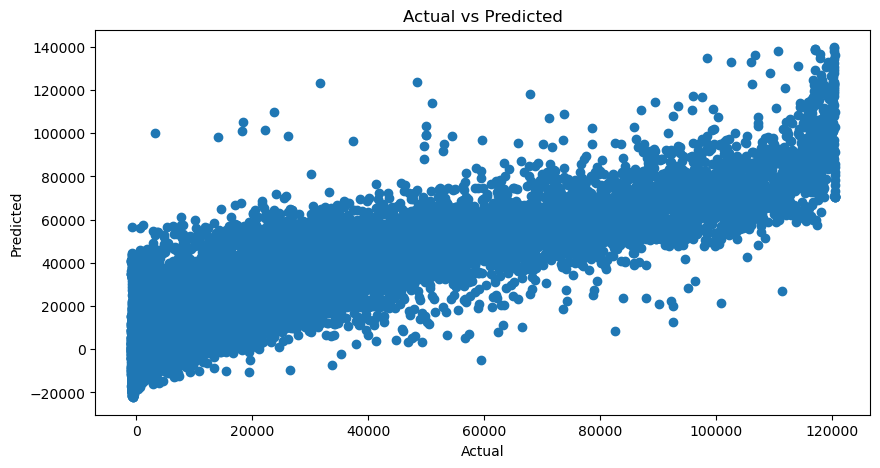

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.scatter(y_test,y_predict)
plt.title('Actual vs Predicted')